In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import Series,DataFrame
from pandas.plotting import lag_plot
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import pandas_datareader.data as web
import datetime
listofcomp=['AAPL','GOOG','MSFT','AMZN']
end = datetime.datetime.now()
start = datetime.datetime(end.year - 1,end.month,end.day)

for x in listofcomp:
    globals()[x]=web.DataReader(x, 'yahoo',start,end)

In [3]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,140.128953,137.296916,138.672016,138.771542,9.112769e+07,138.354867
std,12.584228,12.368393,12.369123,12.502495,2.940268e+07,12.675411
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870
25%,129.720001,126.809998,128.410004,127.900002,6.946360e+07,127.306313
50%,137.339996,134.589996,136.279999,136.690002,8.696030e+07,135.927658
75%,149.169998,146.470001,148.270004,148.119995,1.068203e+08,147.919998
max,182.130005,175.529999,181.119995,179.449997,1.925415e+08,179.449997


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-14 to 2021-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


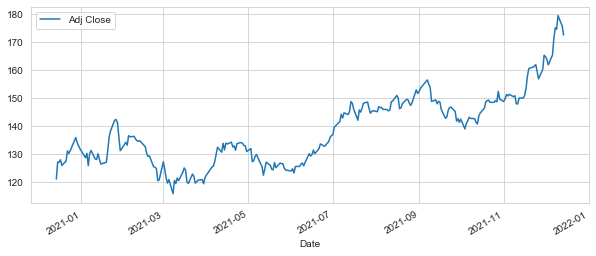

In [5]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

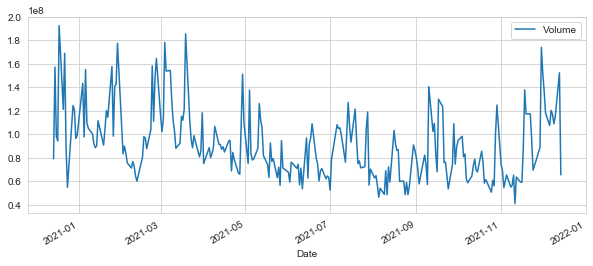

In [6]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [7]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

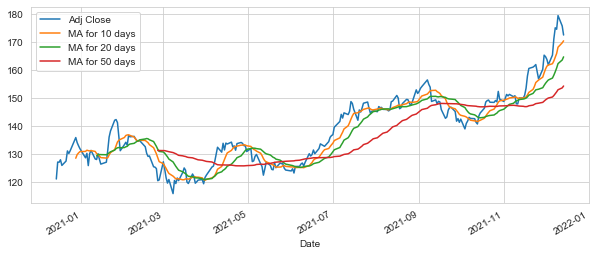

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

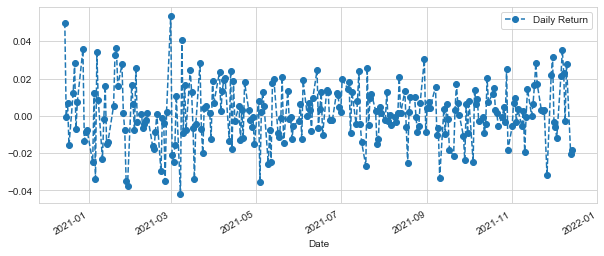

In [9]:
AAPL['Daily Return'] =AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

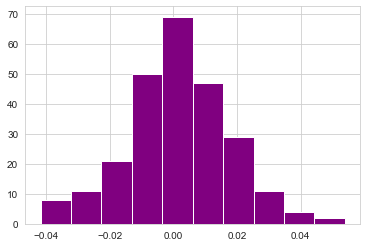

In [10]:
AAPL['Daily Return'].hist(color='purple')

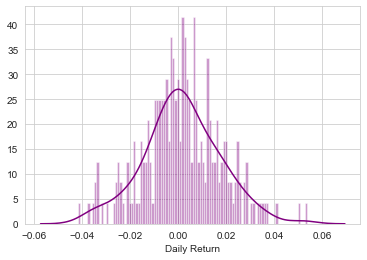

In [12]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100 , color = 'Purple')

In [13]:
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [14]:
closing_df = web.DataReader(listofcomp,'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-14,121.033844,1760.060059,212.419434,3156.969971
2020-12-15,127.096474,1767.770020,212.350021,3165.120117
2020-12-16,127.026901,1763.000000,217.457214,3240.959961
2020-12-17,127.911446,1747.900024,217.596054,3236.080078
2020-12-18,125.883957,1731.010010,216.772934,3201.649902


In [16]:
tech_rets = closing_df.pct_change()

In [17]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-14,NaN,NaN,NaN,NaN
2020-12-15,0.050090,0.004381,-0.000327,0.002582
2020-12-16,-0.000547,-0.002698,0.024051,0.023961
2020-12-17,0.006963,-0.008565,0.000638,-0.001506
2020-12-18,-0.015851,-0.009663,-0.003783,-0.010639


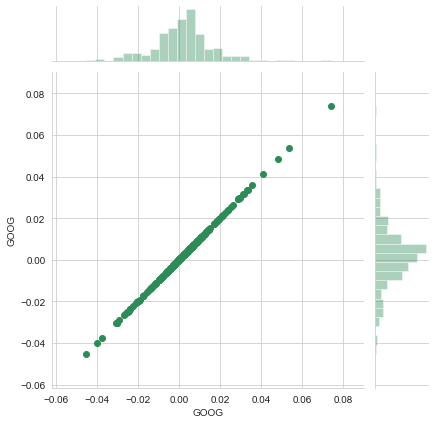

In [18]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

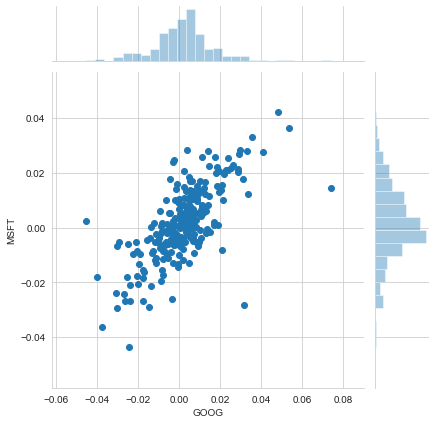

In [19]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

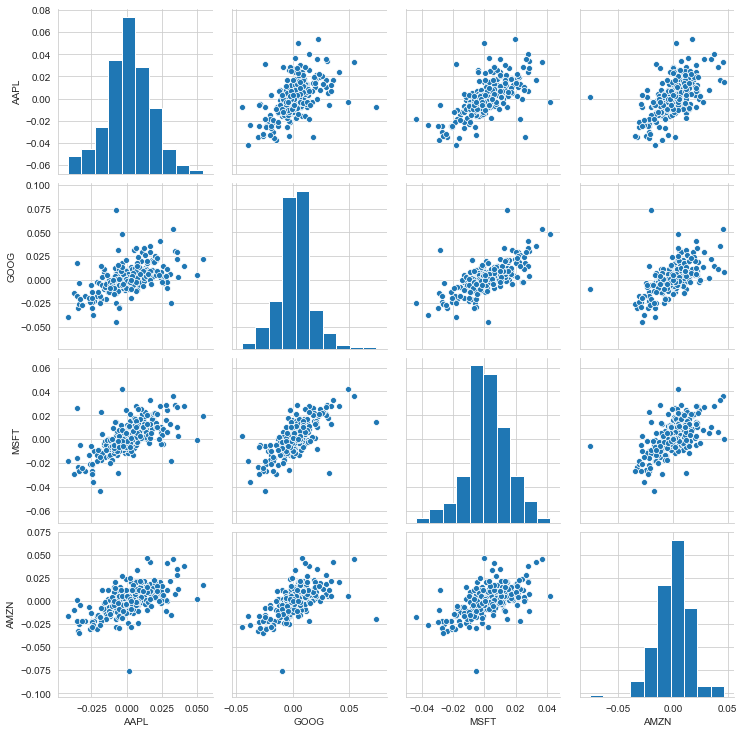

In [20]:
sns.pairplot(tech_rets.dropna())

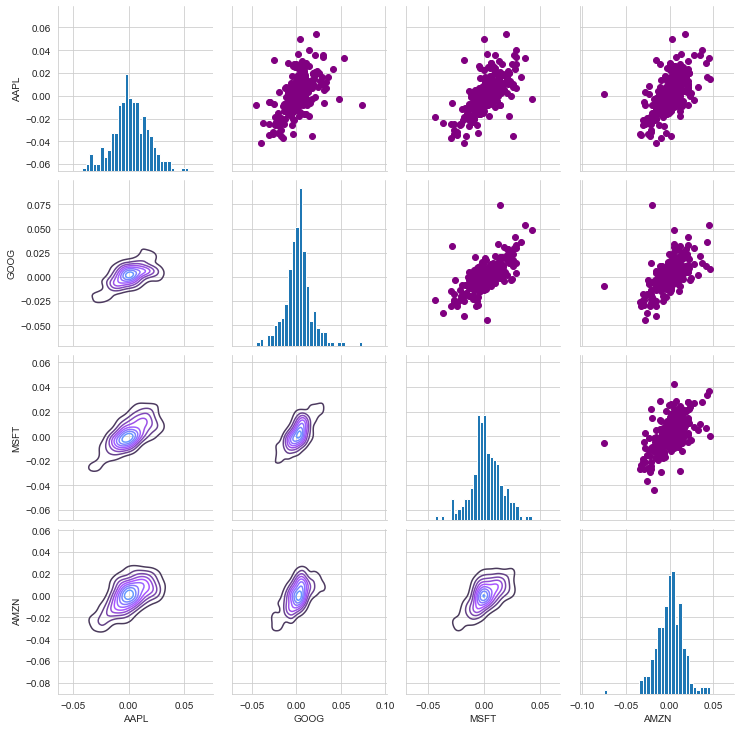

In [21]:

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. 

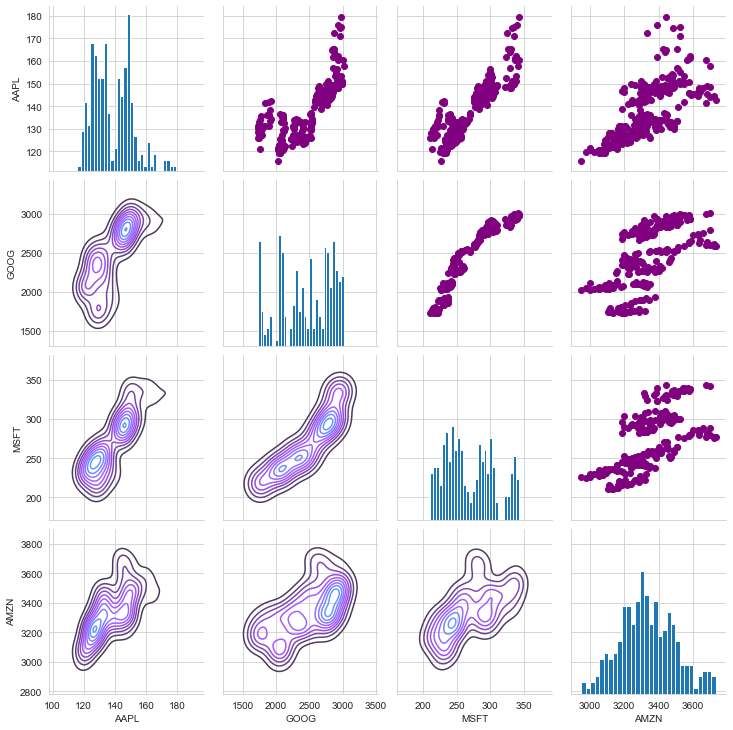

In [22]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

https://www.hackerearth.com/blog/developers/data-visualization-techniques/   : ALL THE PLOTS EXPLAINED WELL HERE.

In [23]:
rets = tech_rets.dropna()

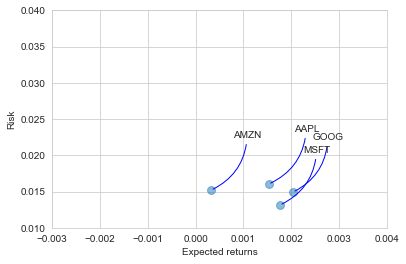

In [25]:
rets=tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)
plt.ylim([0.01,0.040])
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color='blue'))


Value at Risk

 We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. 
 
Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. 



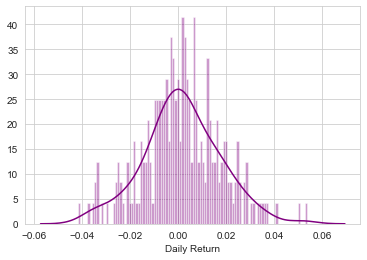

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [27]:
rets['AAPL'].quantile(0.05)

-0.025191669250715143

In [28]:
days = 365
dt =1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']


In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt , scale=sigma*np.sqrt(dt))
        drift[x] =  mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

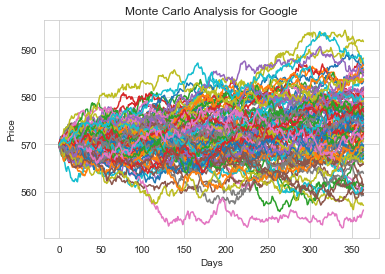

In [30]:
start_price = 569.85
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [83]:
runs = 1000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = np.round(stock_monte_carlo(start_price,days,mu,sigma))[days - 1];

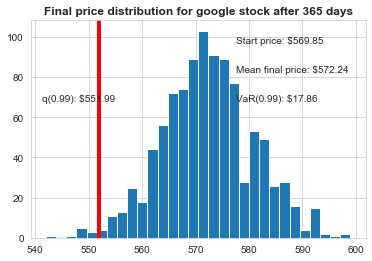

In [94]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=30)
plt.figtext(0.6, 0.8, s = 'Start price: $%.2f ' %start_price)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulations.mean())
plt.figtext(0.6, 0.6 , 'VaR(0.99): $%.2f'  % (start_price - q,))
plt.figtext(0.15, 0.6,  'q(0.99): $%.2f' % q)

plt.axvline(x=q , linewidth= 4, color='r')

plt.title('Final price distribution for google stock after %s days' % days,weight='bold');

In [57]:
listofcomp=['AAPL','GOOG','MSFT','AMZN']
end = datetime.datetime.now()
start = datetime.datetime(end.year - 5,end.month,end.day)

for x in listofcomp:
    globals()[x]=web.DataReader(x, 'yahoo',start,end)

In [58]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,74.031339,72.475347,73.232476,73.291121,1.210694e+08,72.094149
std,40.136512,39.169758,39.654618,39.671835,5.614301e+07,40.151560
min,28.980000,28.437500,28.459999,28.797501,4.100000e+07,27.106562
25%,43.136876,42.417499,42.761875,42.766876,8.378330e+07,41.174194
50%,53.702499,52.727501,53.272501,53.209999,1.062192e+08,51.764996
75%,116.053753,112.820002,114.645002,114.962500,1.411900e+08,114.061335
max,182.130005,175.529999,181.119995,179.449997,4.479400e+08,179.449997


In [59]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2016-12-13 to 2021-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


Text(0.5, 1.0, 'APPLE STOCK PRICES')

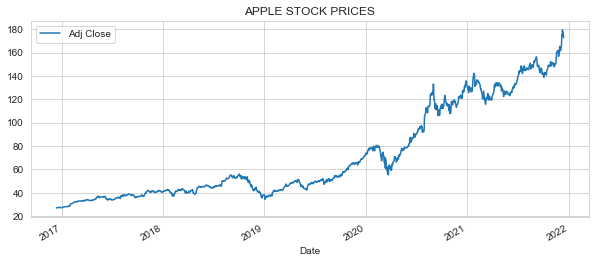

In [60]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
plt.title('APPLE STOCK PRICES')


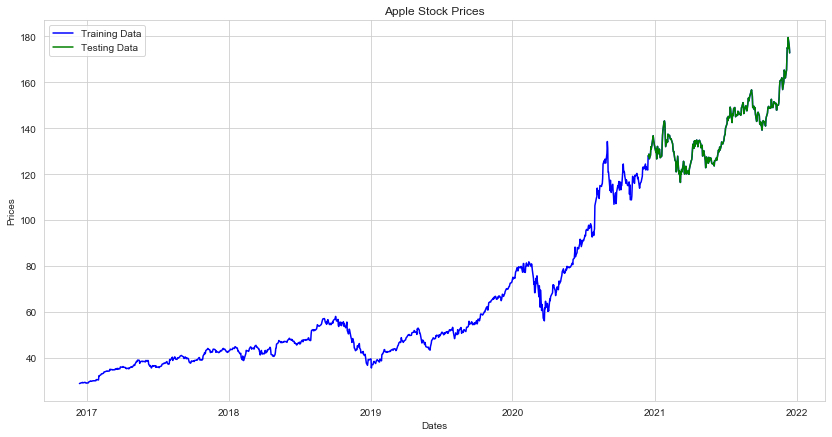

In [61]:
train_data, test_data = AAPL[0:int(len(AAPL)*0.8)], AAPL[int(len(AAPL)*0.8):]
plt.figure(figsize=(14,7))
plt.title('Apple Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(AAPL['Close'], 'blue', label ='Training Data')
plt.plot(test_data['Close'],'green', label='Testing Data')
plt.legend()



ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.

An ARIMA model is characterized by 3 terms (p, d, q):
p is the order of the AR term
d is the number of differencing required to make the time series stationary
q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

STATIONARITY

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times.

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

ADF TEST

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.


In [ ]:
#Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(AAPL.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

Since p-value > 0.05, therefore time series is not staionary

In [ ]:
pip install pmdarima


In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(AAPL.Close, test = "adf")

Therefore d value is 1

p 

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

Wecan find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

diff = AAPL.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA model.

We can look at the ACF plot for the number of MA terms.

In [ ]:
diff = AAPL.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);


In [ ]:
dataset = AAPL.copy()
dataset= dataset[['Close']]
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(dataset, ax=pyplot.gca(), lags=10)
pyplot.subplot(212)
plot_pacf(dataset, ax=pyplot.gca(), lags=10)
pyplot.show()

In order to evaluate the ARIMA model, I decided to use two different error functions: Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). SMAPE is commonly used as an accuracy measure based on relative errors.

SMAPE is not currently supported in Scikit-learn as a loss function I, therefore, had first to create this function on my own.

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true)*200/ (np.abs(y_pred) + np.abs(y_true)) ))

In [ ]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' %error2)

SMAPE is commonly used loss function for Time Series problems and can, therefore, provide a more reliable analysis. That showed that our model is good.

In [ ]:
print(model_fit.summary())


In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(AAPL['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label ='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend()

In [ ]:
model_fit.plot_predict(
    start=1,
    end=60,
    dynamic=False,
);

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Close'],color='red',label='Actual Price')
plt.legend()
plt.title('APPLE Stock Prices Prediction')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend()

The above image is a zoomed in version. From this can be noticed how the two curves closely follow each other. However, the predicted price seems to look like a “noisy” version of the actual price.

This analysis using ARIMA lead overall to appreciable results. This model demonstrated in fact to offer good prediction accuracy and to be relatively fast compared to other alternatives such as RRNs (Recurrent Neural Networks).